In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist
from hist import Hist
import awkward as ak
from numba import njit, jit
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import pickle

In [3]:
with uproot.open("../data/ar40_0comp.root:CENNS") as cenns:
    en = cenns['ev_en'].array()
    ch1 = cenns['ch1_photontimes'].array()
    ch3 = cenns['ch3_photontimes'].array()
z = ak.zip({"en": en, "ch1": ch1, "ch3": ch3}, depth_limit=1)

In [9]:
@njit
def detector_response(events):
    lys = []
    ens = []
    for event in events:
        top_pes = []
        bot_pes = []
        for pe in event['ch1']:
            top_pes.append(pe)
        for pe in event['ch3']:
            bot_pes.append(pe)
        if len(top_pes) >= 2 and len(bot_pes) >= 2:
            lys.append(len(top_pes) + len(bot_pes))
            ens.append(event['en'])
    return lys, ens

In [10]:
lys, ens = detector_response(z)

In [14]:
h_resp = Hist(hist.axis.Regular(200, 0, 200, name='Recoil energy [keV]'), hist.axis.Regular(500, 0, 500, name='PEs'))
h_resp.fill(ens, lys)

Hist(
  Regular(200, 0, 200, name='Recoil energy [keV]'),
  Regular(500, 0, 500, name='PEs'),
  storage=Double()) # Sum: 193822.0

Text(0.5, 1.0, 'COH-Ar-750 Ar40 Response Matrix')

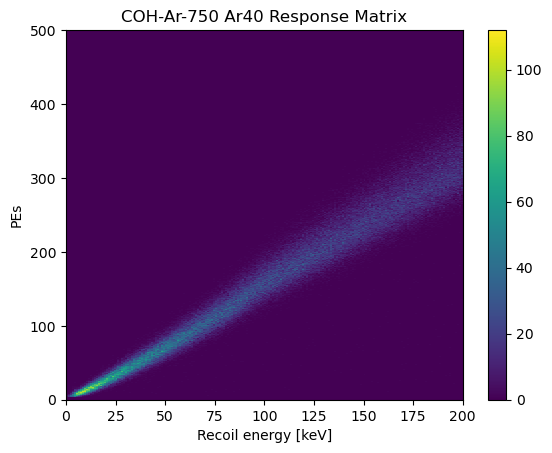

In [15]:
w, x, y = h_resp.to_numpy()
fig, ax = plt.subplots()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel("Recoil energy [keV]")
ax.set_ylabel("PEs")
fig.colorbar(mesh)
ax.set_title("COH-Ar-750 Ar40 Response Matrix")

In [16]:
fig.savefig("../plots/cenns10_response.png")

In [17]:
np.save("../data/cenns10_response.npy", w)